# Quantum Teleportation Protocol  🙋🏻‍♂️⚛️  🙋🏻‍♀️⚛️
![display image](https://media.tenor.com/NjyDOglTZ4kAAAAC/goku-teleport.gif)

# 🎯 OBJECTIVE
The objective of this protocol is to transmit the information of a qubit |d> between two entities (e.g., Goku and Vegeta)

# 👀 WHY IT IS IMPORTANT

## 🔐 Secure communication 
Quantum teleportation can be used to transmit information in a secure way, as any attempt to intercept or measure the transmitted information would disrupt the quantum state, making it impossible for a third party to access the information.

(Again) It is impossible to eavesdrop on a message encoded in quantum states without being detected.

# ❌ ATTENTION
## 1) Not faster than light
An event in one place can’t have a physical, observable effect at another place in less time than it takes for light to travel between the sites. 

Quantum teleportation does not transmit any faster-than-light causal influence, because you also need the classical channel — limited to light speed at best — to complete the process.

## 2) Quantum states cannot be copied
It’s crucial that the teleported state is never actually copied. The fact that it is destroyed during the entanglement-enabled teleportation ensures that there is never a duplicate. The process thereby observes a fundamental principle in quantum mechanics, called no-cloning: it is impossible to make a copy of an arbitrary (unknown) quantum state.

# 🏁 Now we are ready to start!

## What we need:

    - Goku (Sender)
    - Vegeta (Receiver)
    - Master Muten (Coordinator)
    
## High level idea:
    
A) Goku wants to send the information of qubit $|d>$ to Vegeta.
    
B) Master Muten prepares a two qubits entangled state. (i.e. $\frac{1}{\sqrt{2}}(|00> + |11>$). 
Let us call the entangled qubits $|v>$ and $|g>$ (or, $|vg>$)
    
C) Then Master Muten gives the qubits:
<ol>
  <li> $|g>$ to Goku, and </li>
  <li> $|v>$ to Vegeta </li>
</ol>    

D) Goku encodes the information $\alpha|0> + \beta|1>$ in the qubit $|d>$ and performs some operations on $|d>$

D.1) Goku measures $|d>$ and $|g>$ obtaining $c_d$ and $c_g$ and sends them to Vegeta. Note that the state $|d>$ is destroyed since measured.
  
E) Vegeta, given $c_d$ and $c_g$, is able to reconstruct $|d> = \alpha|0> + \beta|1>$ 

# 🧑🏻‍💻 Let's code!

In [1]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library import HGate, CXGate, XGate, ZGate, SwapGate

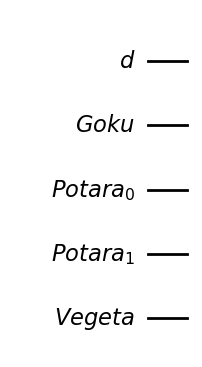

In [2]:
d = QuantumRegister(1, 'd') #informazione che Goku vuole mandare a Vegeta
g = QuantumRegister(1, 'Goku')
p = QuantumRegister(2, 'Potara')
v = QuantumRegister(1, 'Vegeta')

teleportation_circuit = QuantumCircuit(d, g, p, v)

teleportation_circuit.draw('mpl')

# 1) Create a Bell Pair


In [3]:
def create_bell_pail(qc, sender, receiver):
    qc.append(HGate(), [sender])
    qc.append(CXGate(), [sender, receiver])
    qc.barrier()

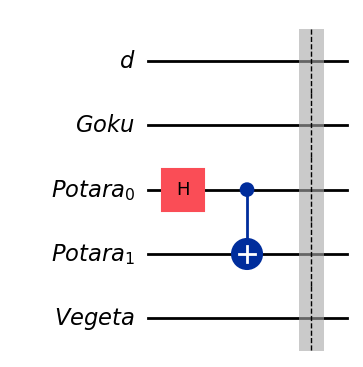

In [4]:
create_bell_pail(teleportation_circuit, p[0], p[1])

teleportation_circuit.draw('mpl')

## 1.5) For illustration purposes ☣️

In [5]:
def distribute_bell_state(qc, coordinator, sender, receiver):
    qc.append(SwapGate(), [coordinator[0], sender[0]])
    qc.append(SwapGate(), [coordinator[1], receiver[0]])
    qc.barrier()

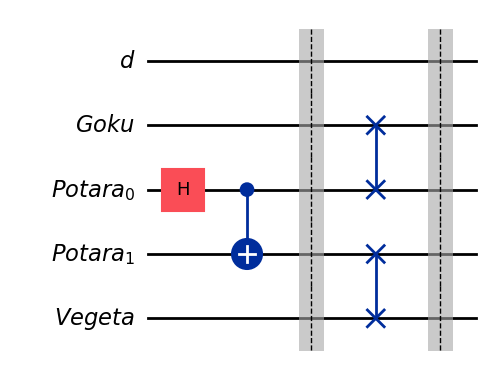

In [6]:
distribute_bell_state(teleportation_circuit, p, g, v)

teleportation_circuit.draw('mpl')

### 2) Goku applies a $CX$ gate to the qubit $|g>$ received by Master Muten controlled on qubit $|d>$ (which contains the information Goku wants to sent to Vegeta → $\alpha|0> + \beta|1>$)

In [7]:
def sender_gates(qc, data, sender):
    qc.append(CXGate(), [data[0], sender[0]])
    qc.append(HGate(), [data[0]])
    qc.barrier()

In [8]:
sender_gates(teleportation_circuit, d, g)

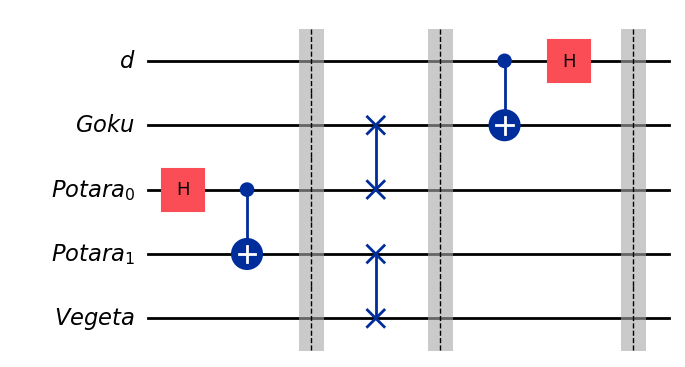

In [9]:
teleportation_circuit.draw('mpl')

### 3) Goku applies a measurement to both qubits that he has (i.e., $|d>$, $|g>$)

In [10]:
def measure_and_send(qc, data, sender, c_data, c_sender):
    qc.measure(data, c_data)
    qc.measure(sender, c_sender)
    qc.barrier()

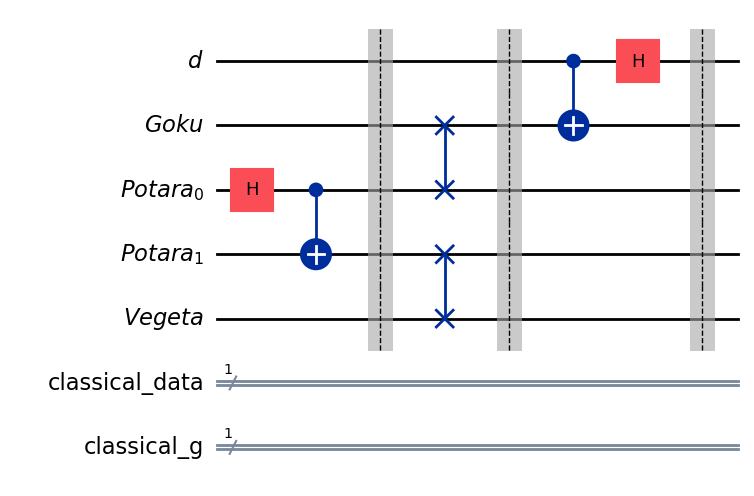

In [11]:
from qiskit import ClassicalRegister

c_d = ClassicalRegister(1, 'classical_data')
c_g = ClassicalRegister(1, 'classical_g')

teleportation_circuit.add_register(c_d)
teleportation_circuit.add_register(c_g)

teleportation_circuit.draw('mpl')

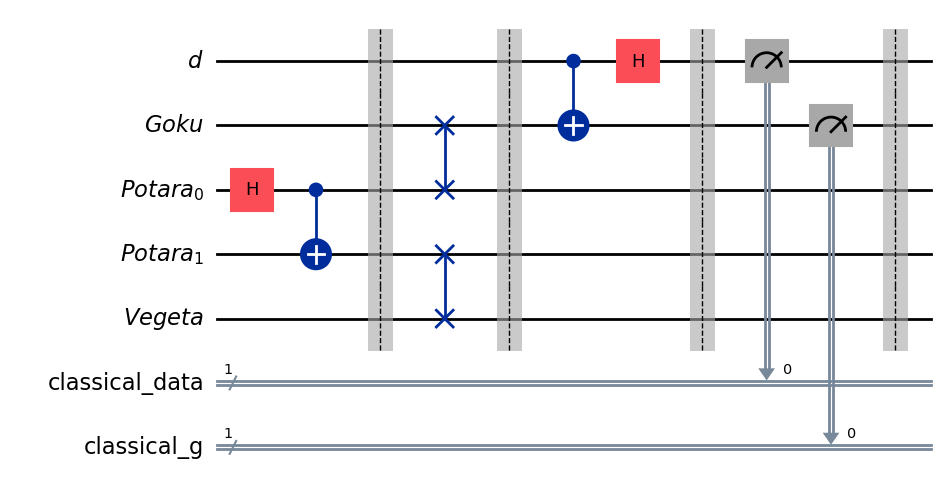

In [12]:
measure_and_send(teleportation_circuit, d, g, c_d, c_g)

teleportation_circuit.draw('mpl')

## ✉️ By means of a classical channel, Goku sends to Vegeta the values measured (respectively, $c_d$, $c_g$)

# It's Vegeta time!
![display image](https://media.tenor.com/lHMVFXk1tCAAAAAC/dragon-ball-dragon-ball-z.gif)

## 4) Vegeta applies the following gates depending on the state of the classical bits $c_d$, $c_g$:

- 00 → Do nothing

- 10 → Apply X

- 01 → Apply Z

- 11 → Apply ZX gate

In [15]:
def receiver_gates(qc, receiver, c_data, c_sender):
    with qc.if_test((c_sender, 1)):
        qc.append(XGate(), receiver)
    with qc.if_test((c_data, 1)):
        qc.append(ZGate(), receiver)
        

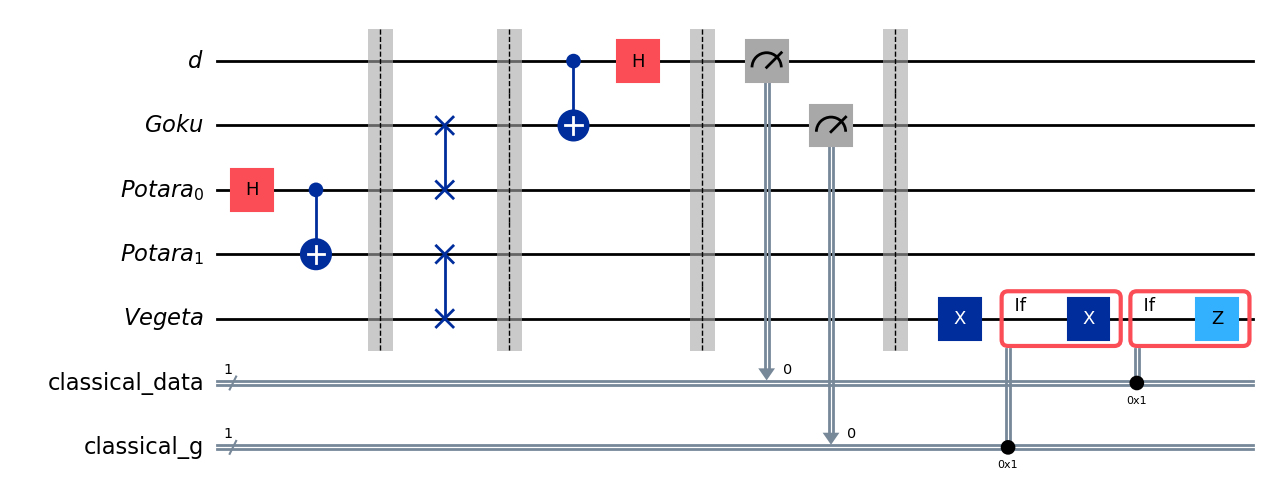

In [16]:
receiver_gates(teleportation_circuit, v, c_d, c_g)

teleportation_circuit.draw('mpl')

# Let's test our teleportation circuit! ⚡

![display image](https://j.gifs.com/7a403b.gif)

In [17]:
from qiskit.quantum_info import random_statevector
from qiskit.circuit.library import Initialize
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex

<IPython.core.display.Latex object>

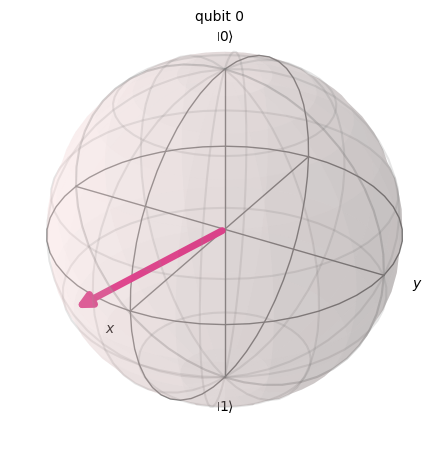

In [18]:
#Create random 1-qubit state
data = random_statevector(2, seed=12)

# Display
display(array_to_latex(data, prefix="|d\\rangle ="))

# |d> on Bloch sphere
plot_bloch_multivector(data)

In [19]:
initializer_gate = Initialize(data)
initializer_gate.label = 'data_encoder'

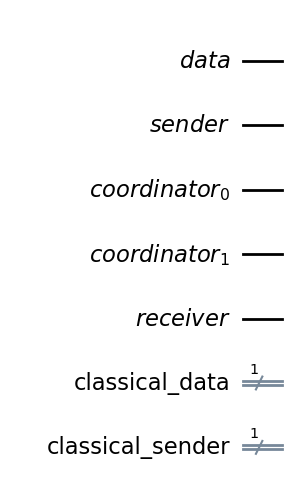

In [20]:
data_qubit = QuantumRegister(1, 'data')
sender_qubit = QuantumRegister(1, 'sender')
coordinator_qubits = QuantumRegister(2, 'coordinator')
receiver_qubit = QuantumRegister(1, 'receiver')

c_data = ClassicalRegister(1, 'classical_data')
c_sender = ClassicalRegister(1, 'classical_sender')

qc = QuantumCircuit(data_qubit, sender_qubit, coordinator_qubits, receiver_qubit, c_data, c_sender)

qc.draw('mpl')

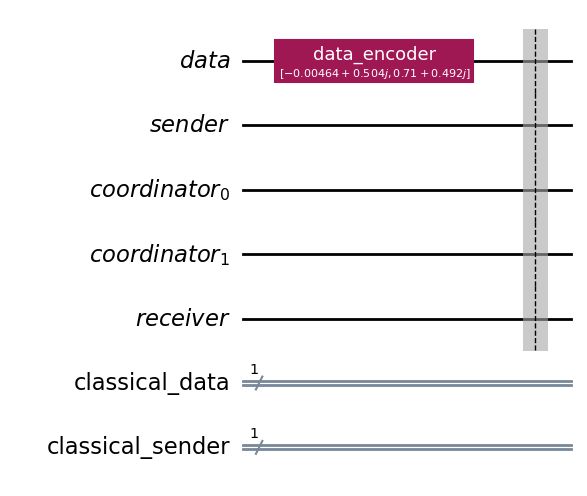

In [21]:
#initialize information to send

qc.append(initializer_gate, data_qubit)
qc.barrier()
qc.draw('mpl')

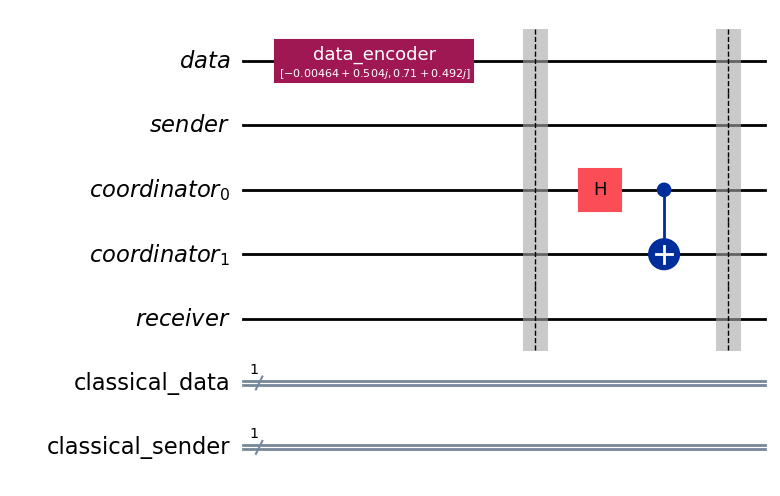

In [22]:
# step 1
create_bell_pail(qc, coordinator_qubits[0], coordinator_qubits[1])

qc.draw('mpl')

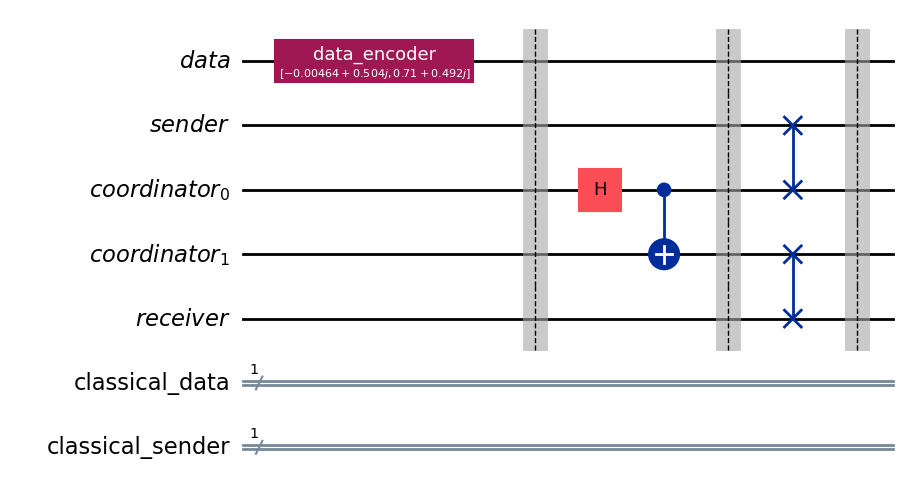

In [23]:
# step 1.5
distribute_bell_state(qc, coordinator_qubits, sender_qubit, receiver_qubit)

qc.draw('mpl')

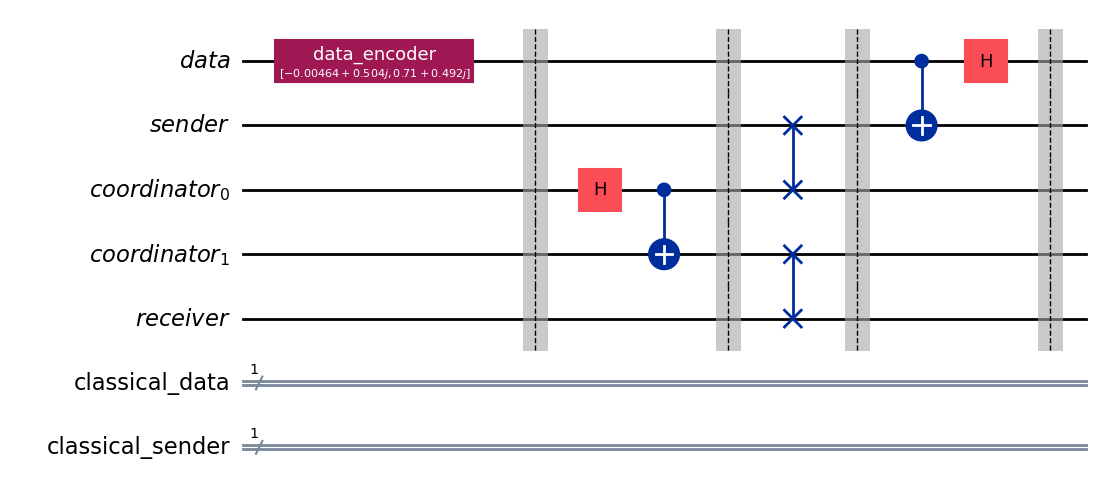

In [24]:
# step 2
sender_gates(qc, data_qubit, sender_qubit)

qc.draw('mpl')

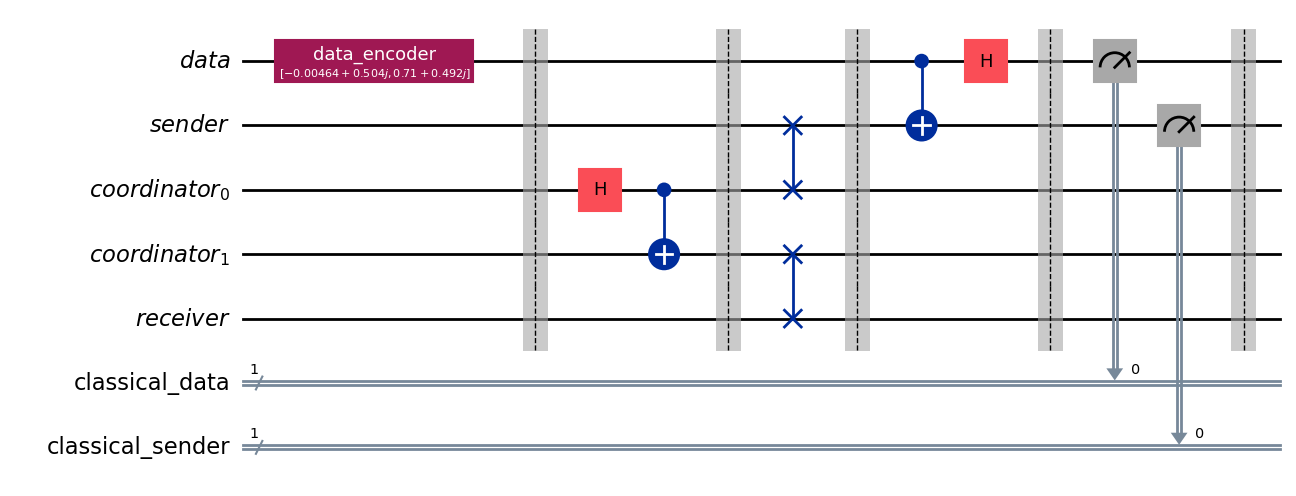

In [25]:
# step 3
measure_and_send(qc, data_qubit, sender_qubit, c_data, c_sender)

qc.draw('mpl')

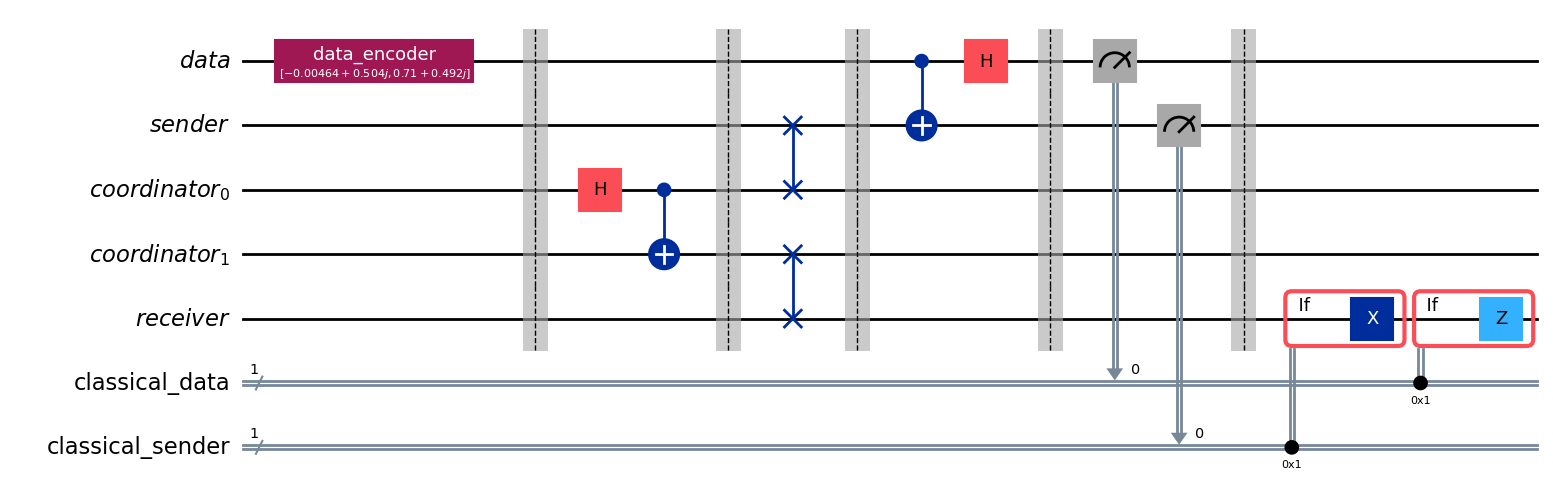

In [26]:
#step 4
receiver_gates(qc, receiver_qubit, c_data, c_sender)

qc.draw('mpl')

In [27]:
from qiskit_aer import StatevectorSimulator
from qiskit.quantum_info import partial_trace

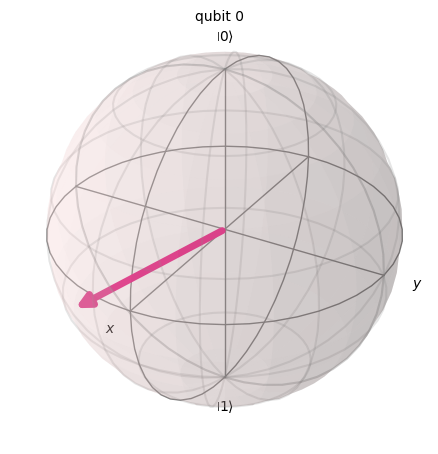

In [28]:
simulator = StatevectorSimulator()  # Create a simulator backend
result = simulator.run(qc).result()  # Run the circuit and get the result
statevector = result.get_statevector() 

traced_state = partial_trace(statevector, [0, 1, 2, 3])

plot_bloch_multivector(traced_state)
# Display


## Simplified (No explicit coordinator) 🌏

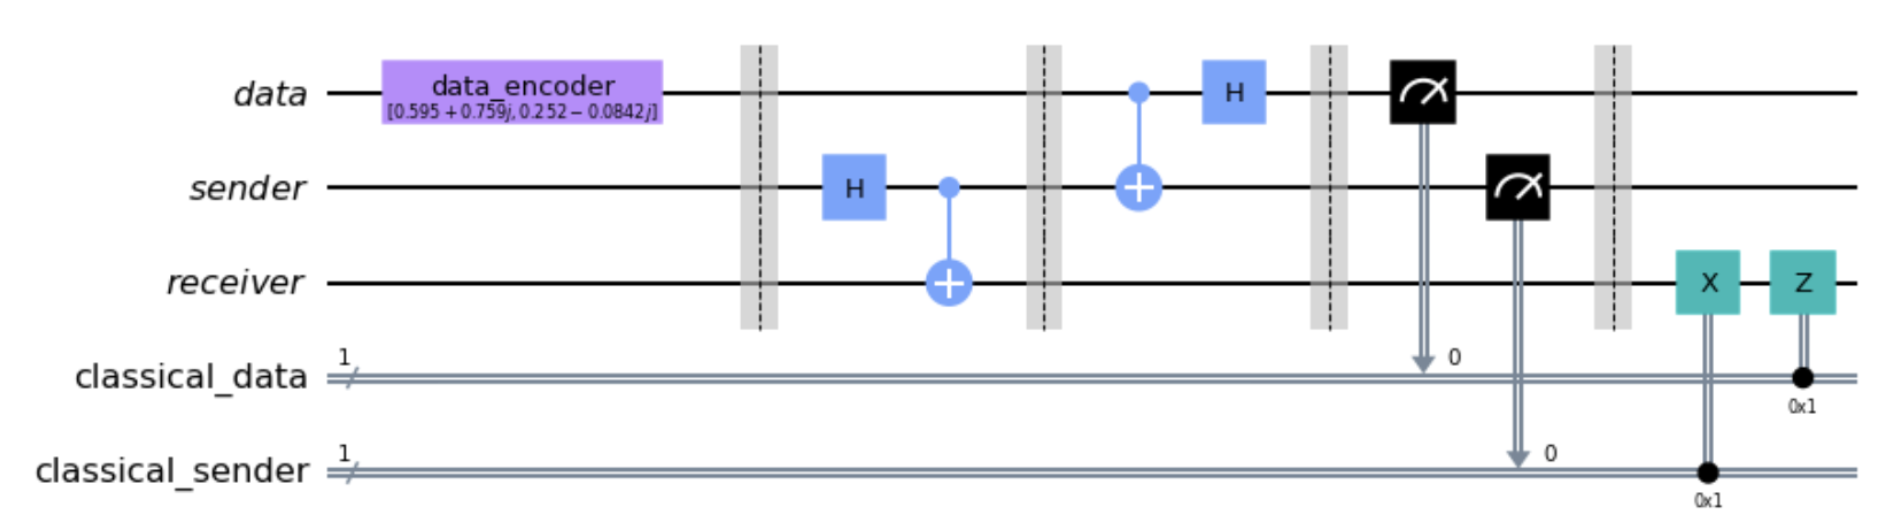